# MLOps Group No: 92 

## Group Members: 
- PEYALA SAMARASIMHA REDDY - 2023AA05072
- PEGALLAPATI SAI MAHARSHI- 2023AA05924 
- ANIRUDDHA DILIP MADURWAR - 2023AA05982 
- K VAMSIKRISHNA - 2023AA05209  


# Assignment 2

# Tasks

## M1: Exploratory Data Analysis (EDA) - Fashion MNIST

### Objective:
Automate data analysis and generate reports for deeper insights into the Fashion MNIST dataset.

### Tasks:
- Use an EDA tool for automated analysis and report generation (e.g., Pandas Profiling, Sweetviz, or D-Tale).
- Provide visual summaries of the dataset, including:
  - Class distribution
  - Missing values
  - Feature correlations

### Deliverables:
- A generated EDA report.
- Key findings with screenshots.


Training set size: 60000 samples
Test set size: 10000 samples
Image dimensions: 28x28 pixels


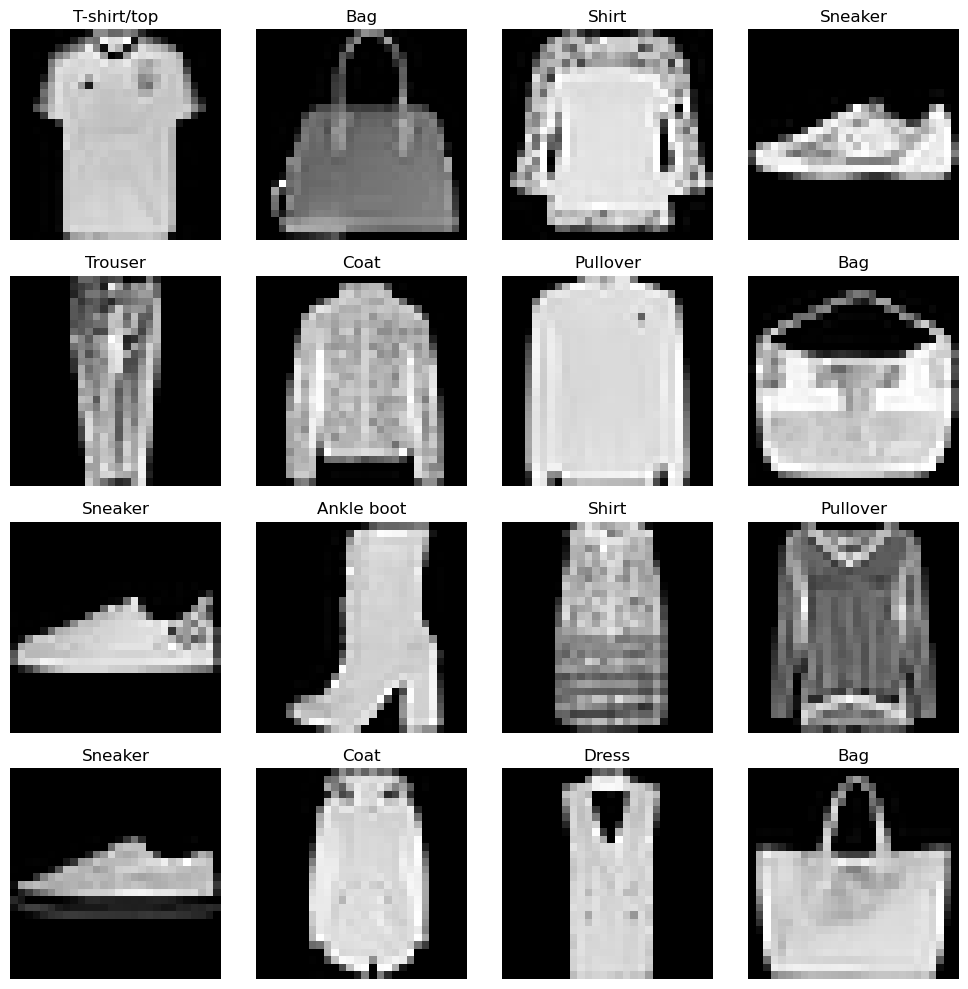

/tmp/ipykernel_90446/1043862184.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette="viridis")


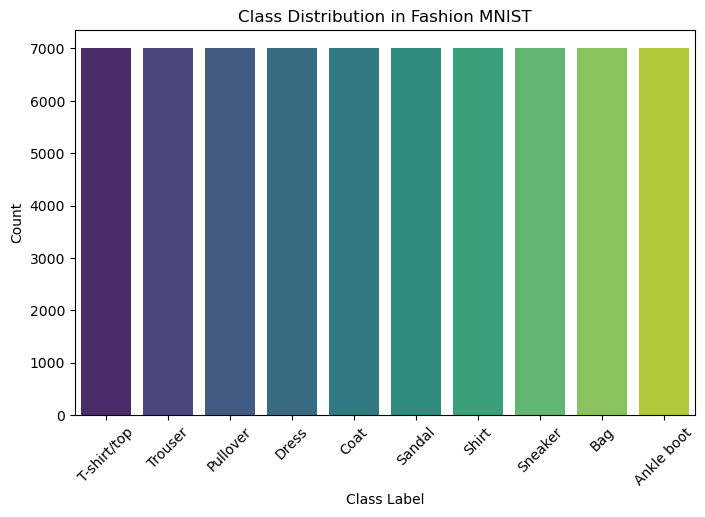

                                             |          | [  0%]   00:00 -> (? left)

Report fashion_mnist_eda_sweetviz.html was generated.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport  
import sweetviz as sv

# 1. Load the Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print dataset information
print(f"Training set size: {x_train.shape[0]} samples")
print(f"Test set size: {x_test.shape[0]} samples")
print(f"Image dimensions: {x_train.shape[1]}x{x_train.shape[2]} pixels")

# 2. Display Sample Images
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(10, 10))
for i in range(16):  # Display 16 random images
    plt.subplot(4, 4, i + 1)
    idx = np.random.randint(0, x_train.shape[0])
    plt.imshow(x_train[idx], cmap="gray")
    plt.title(class_labels[y_train[idx]])
    plt.axis("off")
plt.tight_layout()
plt.show()

# 3. Flatten Images and Create DataFrame
# Reshape 28x28 images into 1D vectors (784 features)
x_train_flattened = x_train.reshape(x_train.shape[0], -1)  
x_test_flattened = x_test.reshape(x_test.shape[0], -1)  

# Convert to Pandas DataFrame
df_train = pd.DataFrame(x_train_flattened)
df_train["label"] = y_train  

df_test = pd.DataFrame(x_test_flattened)
df_test["label"] = y_test  

# Combine train & test sets for a comprehensive analysis
df = pd.concat([df_train, df_test], ignore_index=True)

# 4. Visualizing Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["label"], palette="viridis")
plt.title("Class Distribution in Fashion MNIST")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(10), labels=class_labels, rotation=45)
plt.show()

# 5. Generate Automated EDA Reports

# Fix for Sweetviz - Use a smaller sample and limited features
df_sample = df.sample(n=10000, random_state=42)  # Reduce dataset size for Sweetviz
df_sample = df_sample.iloc[:, :50]  # Keep first 50 features + label
df_sample["label"] = df["label"].iloc[df_sample.index]  # Ensure label column is included

# Sweetviz report (disable pairwise analysis)
sweetviz_report = sv.analyze(df_sample, pairwise_analysis="off")
sweetviz_report.show_html("fashion_mnist_eda_sweetviz2.html", open_browser=False)

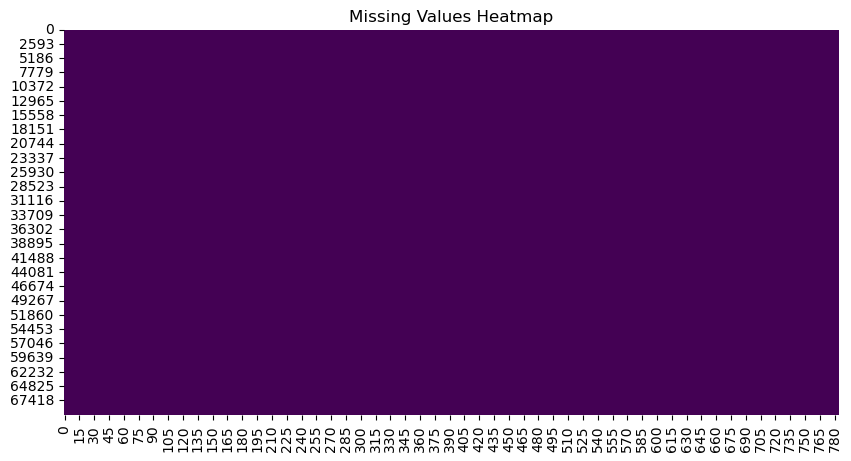

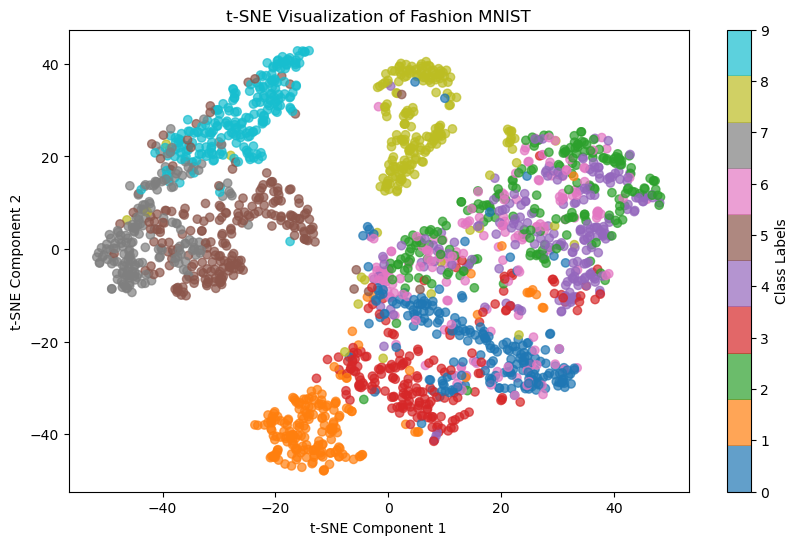

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport  
from sklearn.manifold import TSNE

# Load the Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 3. Flatten Images and Create DataFrame
x_train_flattened = x_train.reshape(x_train.shape[0], -1)  
x_test_flattened = x_test.reshape(x_test.shape[0], -1)  

# Convert to Pandas DataFrame
df_train = pd.DataFrame(x_train_flattened)
df_train["label"] = y_train  

df_test = pd.DataFrame(x_test_flattened)
df_test["label"] = y_test  

# Combine train & test sets for a comprehensive analysis
df = pd.concat([df_train, df_test], ignore_index=True)

# Missing Values Visualization (Should be None)
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Feature Visualization using t-SNE (Instead of Correlation Matrix)
# Select 2000 samples for visualization
sample_indices = np.random.choice(df.shape[0], 2000, replace=False)
df_sample = df.iloc[sample_indices]

# Extract features & labels
X_sample = df_sample.drop(columns=["label"]).values
y_sample = df_sample["label"].values

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X_sample)

# Plot t-SNE visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_sample, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, ticks=np.arange(10), label="Class Labels")
plt.title("t-SNE Visualization of Fashion MNIST")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

# Generate Automated EDA Report (ydata-profiling)
profile = ProfileReport(df_train, title="Fashion MNIST EDA Report", minimal=True)
profile.to_file("fashion_mnist_eda_ydata_profiling.html")


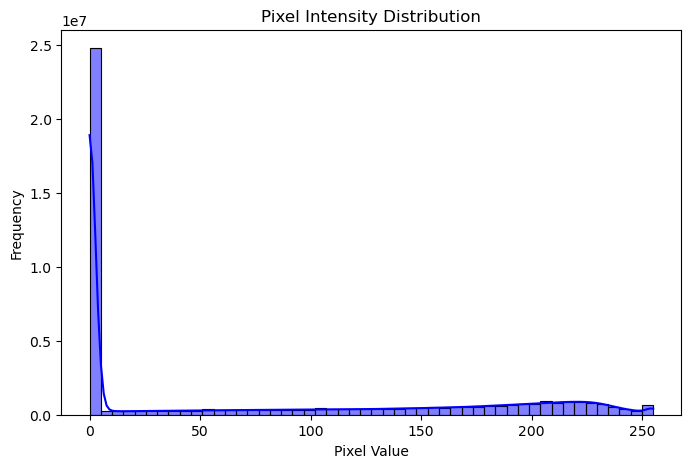

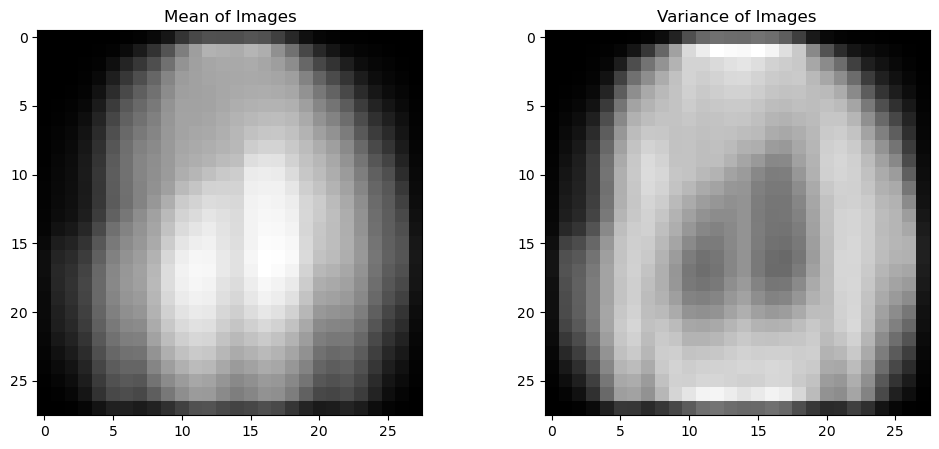

In [6]:

# Pixel Intensity Distribution
plt.figure(figsize=(8, 5))
sns.histplot(x_train.flatten(), bins=50, kde=True, color="blue")
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

# t-SNE Visualization (Dimensionality Reduction)
# Flatten images and take a sample of 3000 images for better visualization
num_samples = 3000
idxs = np.random.choice(range(len(x_train)), num_samples, replace=False)
x_sample = x_train[idxs].reshape(num_samples, -1)
y_sample = y_train[idxs]

# Compute Mean and Variance of Images
mean_image = np.mean(x_train, axis=0)
var_image = np.var(x_train, axis=0)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(mean_image, cmap="gray")
plt.title("Mean of Images")

plt.subplot(1, 2, 2)
plt.imshow(var_image, cmap="gray")
plt.title("Variance of Images")

plt.show()


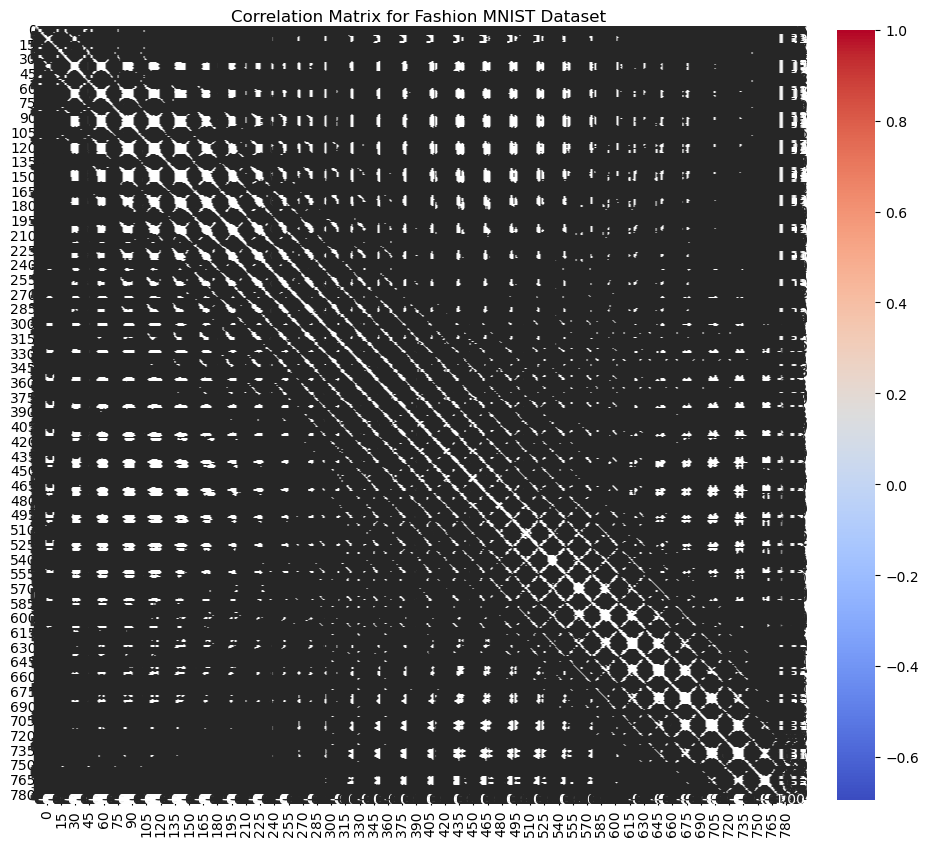

In [8]:
from sklearn.preprocessing import LabelEncoder

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess: Flatten the images and combine them with labels
x_train_flatten = x_train.reshape(-1, 28 * 28)  # Flatten the 28x28 images
x_test_flatten = x_test.reshape(-1, 28 * 28)

# Convert to DataFrame for correlation analysis
train_df = pd.DataFrame(x_train_flatten)
train_df['label'] = y_train  # Add labels to the dataframe

# Optionally, reduce the dataset to 1% for quick analysis (if dataset is large)
train_df = train_df.sample(frac=0.01, random_state=42)

# Encode the labels if needed (though in this case, they are already numeric)
label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['label'])

# Generate the correlation matrix for features and labels
corr_matrix = train_df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix for Fashion MNIST Dataset")
plt.show()
